In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
import warnings
warnings.filterwarnings("ignore")

In [39]:
df = pd.read_csv('books.csv')

In [40]:
df.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [41]:
column_names = df.columns.tolist()
column_names

['book_id',
 'goodreads_book_id',
 'best_book_id',
 'work_id',
 'books_count',
 'isbn',
 'isbn13',
 'authors',
 'original_publication_year',
 'original_title',
 'title',
 'language_code',
 'average_rating',
 'ratings_count',
 'work_ratings_count',
 'work_text_reviews_count',
 'ratings_1',
 'ratings_2',
 'ratings_3',
 'ratings_4',
 'ratings_5',
 'image_url',
 'small_image_url',
 'NonEnglish']

# 1. No. of Rows & Columns

In [42]:
df.shape

(399, 24)

In [43]:
rows,col = df.shape
print(f"No. of rows in books dataset is {rows}")
print(f"No. of columss in books dataset is {col}")

No. of rows in books dataset is 399
No. of columss in books dataset is 24


# 2. Null values in 'original_title'

In [44]:
#isnull() is used to find null values
missing_title = df['original_title'].isnull().sum()
print(f"No. of books do not have an original title is {missing_title}")

No. of books do not have an original title is 36


# 3. Unique books in dataset

In [45]:
#To find unique values in book_id column
df['book_id'].nunique()

399

In [46]:
#dropping the null values in 'original_title' using dropna
data = df.dropna(subset=['original_title'])

In [47]:
#size of the data after removing null values
data.shape

(363, 24)

In [48]:
#Finding unique books based on the 'book_id'
unique_books = data['book_id'].nunique()
print(f"No. of unique books after removing null values is {unique_books}")

No. of unique books after removing null values is 363


# 4. average rating

In [49]:
#mean() function is used to find average
avg_rating = data['average_rating'].mean()
avg_rating

3.9870798898071644

# 5. No. of books published in the year ‘2000’ (method 1)

In [50]:
#groupby function is used to group all the years
books_published = data.groupby('original_publication_year')['original_publication_year'].count()
print(f"The no. of books published  in the year 2000 is {books_published[2000]}")

The no. of books published  in the year 2000 is 7


Method-2

In [51]:
books_published_1 = data[data['original_publication_year'] == 2000]
num_books_published = books_published_1.shape[0]
print(f"Number of books published in the year 2000: {num_books_published}")

Number of books published in the year 2000: 7


# 6. maximum no. of ratings based on 'work_ratings_count'

In [52]:
#indexmax() returns index of the maximum value
max_rating = data.loc[data['work_ratings_count'].idxmax()]
# max_rating
max_rating['title']

'The Diary of a Young Girl'

# 7. Bucket the 'average_rating' of books

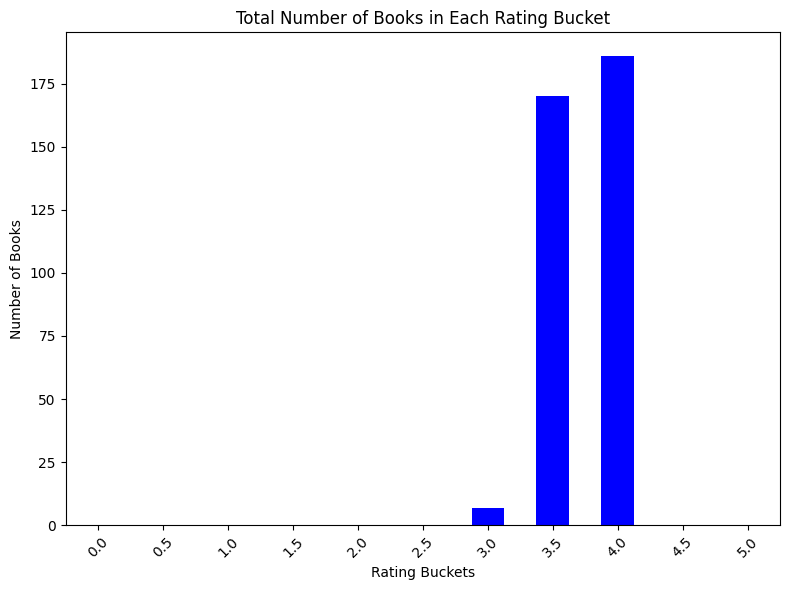

In [59]:
buckets = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]
bucket_labels = ['0.0', '0.5', '1.0', '1.5', '2.0', '2.5', '3.0', '3.5', '4.0', '4.5','5.0'] 

# Bucketing average_rating in each bucket
data['rating_bucket'] = pd.cut(data['average_rating'], bins=buckets, right=False, labels=bucket_labels)
rating_per_bucket = data['rating_bucket'].value_counts().sort_index()

# Plotting the graph
plt.figure(figsize=(8, 6))
rating_per_bucket.plot(kind='bar', color='blue')
plt.title('Total Number of Books in Each Rating Bucket')
plt.xlabel('Rating Buckets')
plt.ylabel('Number of Books')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()